In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import torch
import torch.nn as nn

from sklearn import datasets
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Walmart (2).csv']))
print(df.head())

Saving Walmart.csv to Walmart (2).csv
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [29]:
new_df=df[['Weekly_Sales','Fuel_Price']]
new_df

,Weekly_Sales,Fuel_Price
0,1643690.90,2.572
1,1641957.44,2.548
2,1611968.17,2.514
3,1409727.59,2.561
4,1554806.68,2.625
...,...,...
6430,713173.95,3.997
6431,733455.07,3.985
6432,734464.36,4.000
6433,718125.53,3.969


In [40]:
x0 = df['Fuel_Price']
y0 = df['Weekly_Sales']

xt = torch.tensor(x0.values, dtype=torch.float32)
yt = torch.tensor(y0.values, dtype=torch.float32) / 1e6  # scale for stability

# Parameters
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

lr = 0.01
n_epoch = 1000  # more epochs

# Forward function
def forward(w, b, x):
    return w*x + b

# Loss and optimizer
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD([w, b], lr=lr)

# Training
for epoch in range(n_epoch):
    y_pred = forward(w, b, xt)
    loss = lossfunc(y_pred, yt)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}: w={w:.6f}, b={b:.6f}, loss={loss:.6f}')

Epoch 100: w=0.273460, b=0.113413, loss=0.333111
Epoch 200: w=0.264763, b=0.143126, loss=0.332152
Epoch 300: w=0.256355, b=0.171852, loss=0.331256
Epoch 400: w=0.248225, b=0.199623, loss=0.330418
Epoch 500: w=0.240366, b=0.226472, loss=0.329635
Epoch 600: w=0.232768, b=0.252429, loss=0.328903
Epoch 700: w=0.225423, b=0.277524, loss=0.328219
Epoch 800: w=0.218321, b=0.301786, loss=0.327579
Epoch 900: w=0.211455, b=0.325241, loss=0.326982
Epoch 1000: w=0.204818, b=0.347917, loss=0.326423


In [48]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


X = df[['Fuel_Price']].values   # predictor
y = df[['Weekly_Sales']].values  # target (2D for scaler)

# Scale for stable training
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)


n_features = X_tensor.shape[1]
model = nn.Linear(n_features, 1)


#  Loss function & optimizer

lr = 0.01
n_epoch = 9000
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


#  Train the model

for epoch in range(n_epoch):
    y_pred = model(X_tensor)
    loss = lossfunc(y_pred, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        [w, b] = model.parameters()
        print(f'Epoch {epoch+1}: w={w[0][0]:.3f}, b={b[0]:.3f}, loss={loss:.6f}')

Epoch 100: w=-0.121, b=0.074, loss=1.023350
Epoch 200: w=-0.008, b=0.010, loss=1.000323
Epoch 300: w=0.007, b=0.001, loss=0.999918
Epoch 400: w=0.009, b=0.000, loss=0.999911
Epoch 500: w=0.009, b=0.000, loss=0.999910
Epoch 600: w=0.009, b=0.000, loss=0.999910
Epoch 700: w=0.009, b=0.000, loss=0.999910
Epoch 800: w=0.009, b=0.000, loss=0.999910
Epoch 900: w=0.009, b=0.000, loss=0.999910
Epoch 1000: w=0.009, b=0.000, loss=0.999910
Epoch 1100: w=0.009, b=0.000, loss=0.999910
Epoch 1200: w=0.009, b=0.000, loss=0.999910
Epoch 1300: w=0.009, b=0.000, loss=0.999910
Epoch 1400: w=0.009, b=0.000, loss=0.999910
Epoch 1500: w=0.009, b=0.000, loss=0.999910
Epoch 1600: w=0.009, b=0.000, loss=0.999910
Epoch 1700: w=0.009, b=0.000, loss=0.999910
Epoch 1800: w=0.009, b=0.000, loss=0.999910
Epoch 1900: w=0.009, b=0.000, loss=0.999910
Epoch 2000: w=0.009, b=0.000, loss=0.999910
Epoch 2100: w=0.009, b=0.000, loss=0.999910
Epoch 2200: w=0.009, b=0.000, loss=0.999910
Epoch 2300: w=0.009, b=0.000, loss=0.99

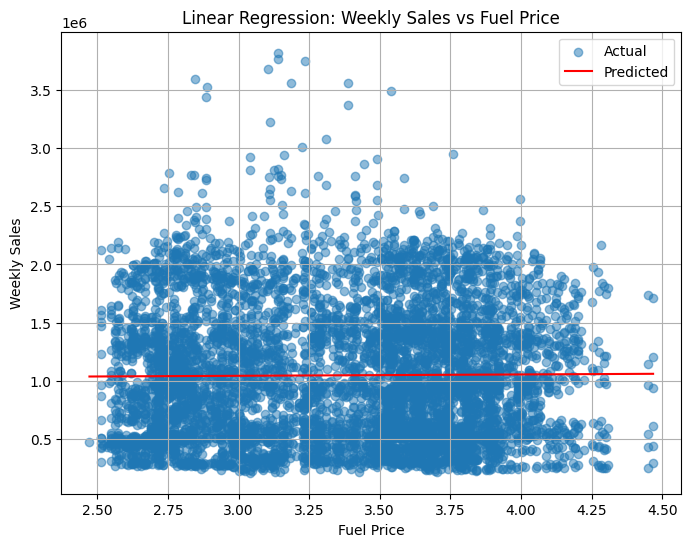

In [49]:

# --------plot----------------


with torch.inference_mode():  # disable gradient calculation
    y_pred_line = model(X_tensor)

# Inverse transform to original scale
y_pred_line_orig = scaler_y.inverse_transform(y_pred_line.numpy())
y_orig = scaler_y.inverse_transform(y_tensor.numpy())

# Optional: sort X for smooth line
sorted_idx = X[:, 0].argsort()
X_sorted = X[sorted_idx]
y_pred_sorted = y_pred_line_orig[sorted_idx]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, y_orig, alpha=0.5, label='Actual')
plt.plot(X_sorted, y_pred_sorted, 'r', label='Predicted')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Linear Regression: Weekly Sales vs Fuel Price')
plt.grid(True)
plt.legend()
plt.show()

simple linear regression